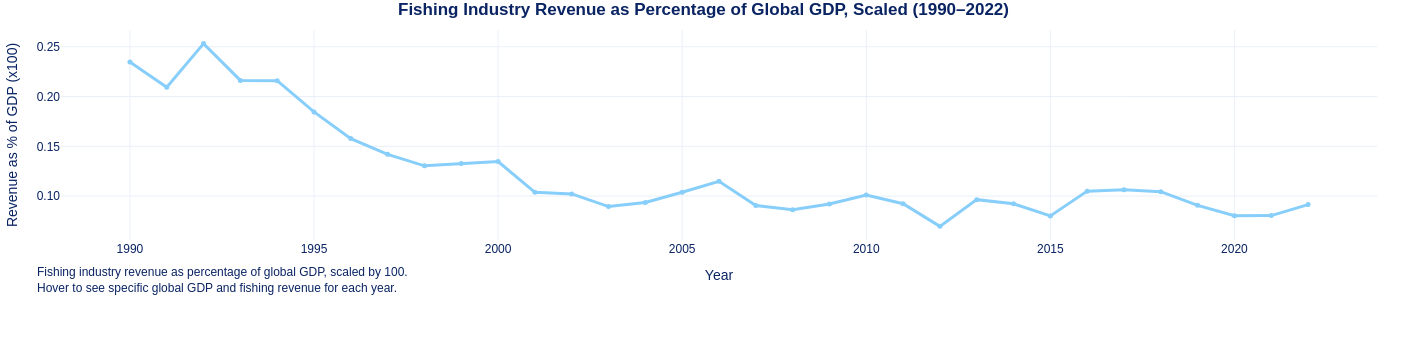

In [26]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv("../data/gdp_and_fishing_revenue.csv")
df = df[df['Year'].between(1990, 2022)].copy()

df["Revenue_pct_GDP"] = ((df["Revenue"] * 100) / df["Total GDP"]) * 100

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df["Year"],
    y=df["Revenue_pct_GDP"],
    mode="lines+markers",
    line=dict(color="#87cefa", width=3),
    marker=dict(size=5),
    name="Fishing Revenue (% of GDP)",
    hovertemplate=(
        "<b>Year</b>: %{x}<br>"
        "<b>Fishing Revenue/GDP</b>: %{y:.2f}%<br>"
        "<b>Fishing Revenue</b>: $%{customdata[0]:,.0f} billion<br>"
        "<b>Total GDP</b>: $%{customdata[1]:,.0f} trillion<extra></extra>"
    ),
    customdata=df[['Revenue', 'Total GDP']]
))

fig.update_layout(
    title={
        'text': '<b>Fishing Industry Revenue as Percentage of Global GDP, Scaled (1990–2022)</b>',
        'x': 0.5,
        'xanchor': 'center',  
    },
    xaxis_title="Year",
    yaxis_title="Revenue as % of GDP (x100)",
    template="plotly_white",
    hovermode="x unified",
    yaxis_tickformat=".2f",
    margin={'l': 30, 'b': 120, 'r': 30, 't': 30},
    font=dict(color='#0a2463')
)

fig.add_annotation(x=-0.02, y=-0.27,
                   xref="paper", yref="paper",
                   showarrow=False,
                   align='left',
                   xanchor='left', yanchor='bottom',
                   text="Fishing industry revenue as percentage of global GDP, scaled by 100. <br>" + \
                        'Hover to see specific global GDP and fishing revenue for each year.')

fig.update_annotations(
    font=dict(color='#0a2463')
)

fig.show()
